In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc

import tensorflow as tf

#### Data
A major part of machine learning is data! In fact, it is so important that most of what we do is focus on exloring, cleaning and selecting the appropriate data.
The dataset we will be using is the titanic dataset, with tons of information about each passengeron the ship. the first step is to understand the data and explore it. off we go.

In [39]:
dftrain = pd.read_csv('../Techwithtim TensorFlow/train.csv') #training data
print(dftrain[:10])
dfeval = pd.read_csv('../Techwithtim TensorFlow/eval.csv')  # evaluationdata for comparison
print(dfeval[:10])

ytrain =dftrain.pop('survived') #pops off the survived col of dftrain and stores in ytrain
yeval = dfeval.pop('survived')  #pops off the survived col of dfeval and stores in ytrain

   survived     sex   age  n_siblings_spouses  parch     fare   class  \
0         0    male  22.0                   1      0   7.2500   Third   
1         1  female  38.0                   1      0  71.2833   First   
2         1  female  26.0                   0      0   7.9250   Third   
3         1  female  35.0                   1      0  53.1000   First   
4         0    male  28.0                   0      0   8.4583   Third   
5         0    male   2.0                   3      1  21.0750   Third   
6         1  female  27.0                   0      2  11.1333   Third   
7         1  female  14.0                   1      0  30.0708  Second   
8         1  female   4.0                   1      1  16.7000   Third   
9         0    male  20.0                   0      0   8.0500   Third   

      deck  embark_town alone  
0  unknown  Southampton     n  
1        C    Cherbourg     n  
2  unknown  Southampton     y  
3        C  Southampton     n  
4  unknown   Queenstown     y  
5  u

In [14]:
print(dftrain.head())#print first 5 rows...with survived sect popped off...
print(dfeval.head())
print('===================================================================================\n====================================================================================');
print(ytrain.head())#print first 5 rows..
print(yeval.head())

      sex   age  n_siblings_spouses  parch     fare  class     deck  \
0    male  22.0                   1      0   7.2500  Third  unknown   
1  female  38.0                   1      0  71.2833  First        C   
2  female  26.0                   0      0   7.9250  Third  unknown   
3  female  35.0                   1      0  53.1000  First        C   
4    male  28.0                   0      0   8.4583  Third  unknown   

   embark_town alone  
0  Southampton     n  
1    Cherbourg     n  
2  Southampton     y  
3  Southampton     n  
4   Queenstown     y  
      sex   age  n_siblings_spouses  parch     fare   class     deck  \
0    male  35.0                   0      0   8.0500   Third  unknown   
1    male  54.0                   0      0  51.8625   First        E   
2  female  58.0                   0      0  26.5500   First        C   
3  female  55.0                   0      0  16.0000  Second  unknown   
4    male  34.0                   0      0  13.0000  Second        D   

  

In [15]:
print(dftrain.describe()) #give metadata about our data

              age  n_siblings_spouses       parch        fare
count  627.000000          627.000000  627.000000  627.000000
mean    29.631308            0.545455    0.379585   34.385399
std     12.511818            1.151090    0.792999   54.597730
min      0.750000            0.000000    0.000000    0.000000
25%     23.000000            0.000000    0.000000    7.895800
50%     28.000000            0.000000    0.000000   15.045800
75%     35.000000            1.000000    0.000000   31.387500
max     80.000000            8.000000    5.000000  512.329200


In [16]:
print(dftrain.shape)#should return number of rows by cols

(627, 9)


### Graphing the data

<AxesSubplot:>

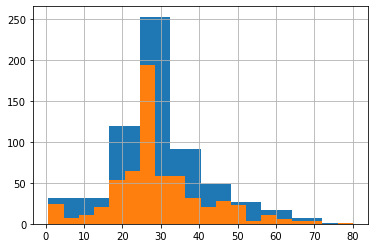

In [18]:
dftrain['age'].hist()
dftrain.age.hist(bins = 20) #dudes rendition

<AxesSubplot:>

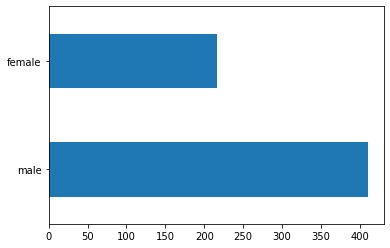

In [27]:
dftrain['sex'].value_counts().plot(kind = 'barh')
# sex a non numeric field hence the need for value_counts method, which counts the num of male and
# female and horizontally graphs it out...i tried it and got a non numeric type err.

<AxesSubplot:>

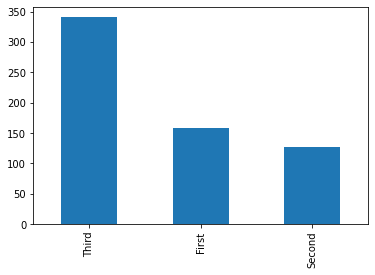

In [31]:
dftrain['class'].value_counts().plot(kind = 'bar')

Text(0.5, 0, '% survive')

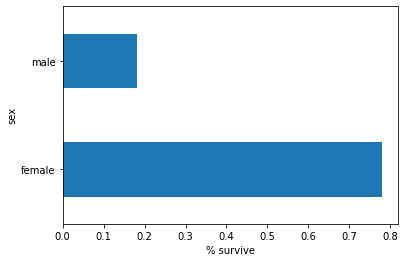

In [40]:
pd.concat([dftrain, ytrain], axis = 1).groupby('sex').survived.mean().plot(kind = 'barh').set_xlabel('% survive')

dunno what the fuck tis pd.concat does, but it seems to append df train to ytrain and group rows by sexes. we then calc the mean of the survived fields for each sex adn chart it in our graph, then add the label of survival rate.

In [38]:
mydftrain = pd.read_csv('../Techwithtim TensorFlow/train.csv') #training data
# print(dftrain.head())
sexdftrain = dftrain.groupby('sex').survived.mean()
print(sexdftrain.head()) #from here we see females have a higher chance of survival 

sex
female    0.778802
male      0.180488
Name: survived, dtype: float64


In [41]:
dfeval.shape #size of the test dataset is less than that of the training data


(264, 9)

In [50]:
print(dftrain['sex'].unique())
print('===================================================================================\n====================================================================================');

print(dftrain['age'].unique())
print('===================================================================================\n====================================================================================');

print(dftrain['n_siblings_spouses'].unique())
print('===================================================================================\n====================================================================================');

print(dftrain['parch'].unique())

print('===================================================================================\n====================================================================================');

print(dftrain['class'].unique())
print('===================================================================================\n====================================================================================');

print(dftrain['deck'].unique())
print('===================================================================================\n====================================================================================');

print(dftrain['embark_town'].unique())
print('===================================================================================\n====================================================================================');

print(dftrain['alone'].unique())
print('===================================================================================\n====================================================================================');

print(dftrain['fare'].unique())

['male' 'female']
[22.   38.   26.   35.   28.    2.   27.   14.    4.   20.   39.   31.
 19.   40.   66.   42.    3.   18.    7.   49.   29.   65.   21.   28.5
 11.   45.   17.   32.   25.    0.83 30.   16.   23.   24.   46.   59.
 71.   34.   33.   37.   47.   14.5  70.5  32.5   9.   51.   55.5  40.5
 44.    1.   50.   36.   58.   20.5  41.   63.   43.   61.   15.   60.
 64.    5.   52.   48.   56.    0.75 54.   62.   53.   57.   80.    6.
 70.   30.5  10.   34.5 ]
[1 0 3 4 2 5 8]
[0 1 2 5 3 4]
['Third' 'First' 'Second']
['unknown' 'C' 'G' 'A' 'B' 'D' 'F' 'E']
['Southampton' 'Cherbourg' 'Queenstown' 'unknown']
['n' 'y']
[  7.25    71.2833   7.925   53.1      8.4583  21.075   11.1333  30.0708
  16.7      8.05    31.275    7.8542  29.125   13.      18.       7.225
  26.      35.5     31.3875 263.       7.8792   7.8958  27.7208 146.5208
   7.75    10.5     82.1708  52.       7.2292  11.2417   9.475   21.
  41.5792  15.5     21.6792  17.8     39.6875  76.7292  61.9792  46.9
  80.      83

In [44]:
print(dftrain.head())

      sex   age  n_siblings_spouses  parch     fare  class     deck  \
0    male  22.0                   1      0   7.2500  Third  unknown   
1  female  38.0                   1      0  71.2833  First        C   
2  female  26.0                   0      0   7.9250  Third  unknown   
3  female  35.0                   1      0  53.1000  First        C   
4    male  28.0                   0      0   8.4583  Third  unknown   

   embark_town alone  
0  Southampton     n  
1    Cherbourg     n  
2  Southampton     y  
3  Southampton     n  
4   Queenstown     y  
